**Table of contents**<a id='toc0_'></a>    
- [**Pie Charts**](#toc1_)    
- [**Stacked and 100% Stacked Bar Charts**](#toc2_)    
    - [*Example of Stacked Bar Plot Using Seaborn*](#toc2_1_1_)    
    - [*Example of 100% Stacked Bar Plot Using Matplotlib*](#toc2_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
# Setting the default seaborn theme
sns.set_theme(style="darkgrid")

# Visualizing Compositions or, Proportions that are independent of time

<i> Displaying individual **parts of a whole** enables **comparisons among subcategories** by evaluating relative proportions, for example, market share by companies for a particular product or service. 

**Note:** The data can be time dependent or independent. But, here we will discuss only about the charts used for visualizing time independent data. </i>

- <i> **Questions:**
1. What are the parts that make up the whole?
2. What part is the largest or smallest?
3. What parts are similar or dissimilar?

- **Insight:** use to show summaries, similarities, anomalies, percentage related to the whole (by category, subcategory, and over time).

- **Data:** single categorical variable with subcategories, two or more variables.

- **Chart options:** pie, stacked bar, stacked 100% bar, tree map, and doughnut chart. </i>

## <a id='toc1_'></a>[**Pie Charts**](#toc0_)

Pie charts show proportions within a whole (Slices add up to 100% or 1). **The slices are subcategories of a single category**.

`->` When to use Pie Charts

- **Usually, a Pie chart is never the answer.**
- A pie chart typically represents numbers in percentages and is used to visualize a part to whole relationship or a composition. Pie charts are **not meant to compare individual sections to each other or to represent exact values** (you should use a bar chart for that).

`->` When to avoid Pie Charts

- Avoid using pie charts if all the slices are similar in size.
- When possible, avoid pie charts and doughnut charts. The human mind thinks linearly but, when it comes to angles and areas, most of us can’t judge them well.

`->` Best practices for Pie charts

- Limit pie charts to six slices or less.
- Label directly on the pie slices, rather than using a legend.
- Make sure that the total sum of all segments equals 100 percent.
- Don’t use 3D or blow apart effects — they reduce comprehension and show incorrect proportions.

> Seaborn doesn't have any default function to draw pie charts. But we can use `matplotlib.pyplot.pie(x, labels, colors, autopct, pctdistance=0.6, labeldistance=1.1)` to draw pie charts. Seaborn color palettes can be passed to the colors argument. The detailed documentation can be found at, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html.

<u> Function Parameters: </u>

- `x (1D array-like):` The wedge sizes.
- `labels (list):` A sequence of strings providing the labels for each wedge
- `colors:` A sequence of colors through which the pie chart will cycle. Accepts Seaborn color palettes.
- `autopct:` If not None, autopct is a string or function used to label the wedges with their numeric value.
- `pctdistance:` The relative distance along the radius at which the the text generated by autopct is drawn. To draw the text outside the pie, set pctdistance > 1.
- `labeldistance:` The relative distance along the radius at which the labels are drawn. To draw the labels inside the pie, set labeldistance < 1.

In [3]:
# loading example dataset
df_tips = sns.load_dataset("tips")
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Note: We assume total bill includes the tip.

In [4]:
# to see what percentage of the total tips were given by smokers and how much by non-smokers,
x = (df_tips.groupby("smoker").tip.agg("sum") / df_tips.tip.agg("sum")) * 100
x

smoker
Yes    38.247355
No     61.752645
Name: tip, dtype: float64

In [5]:
color_palette = sns.color_palette("pastel")

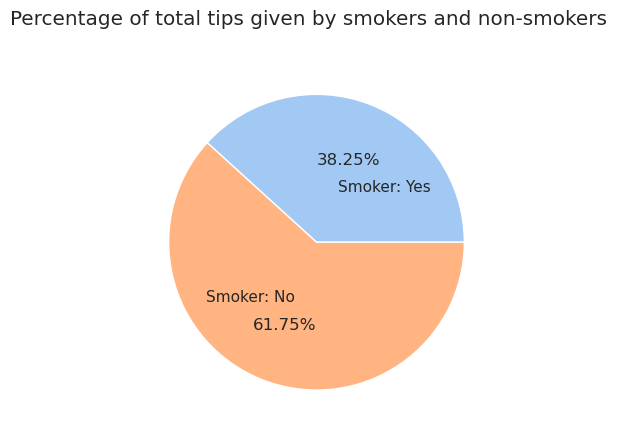

In [6]:
plt.pie(x, labels= "Smoker: " + x.index.astype(str), colors=color_palette, autopct="%.2f%%", labeldistance=0.4)
plt.suptitle("Percentage of total tips given by smokers and non-smokers")
plt.show()

##### **`Caution`**

Be mindful of the data you are representing and also be very careful to understand the implication of your graph. For example, this pie chart is misleading at best and manipulative at worst. We don't know what percentage of the dataset are smokers. If they are significantly below 50% then it's only natural that the total percentage of tip would also be less. Even then, we should also probably look at the percentage of tip compared to the total bill instead of just plain percentage of total tip.

In [7]:
percentage_of_customers_who_are_smokers = round((df_tips.smoker.value_counts()[1] / df_tips.smoker.value_counts().sum()) * 100, 2)

In [8]:
percentage_of_customers_who_are_smokers

38.11

This is essentially the same as the percentage of tip contribution (compared to the total) presented in the above pie chart.

In [9]:
df_tips.assign(tip_percent = round((df_tips.tip/df_tips.total_bill) * 100, 2)).groupby("smoker").tip_percent.agg("mean")

smoker
Yes    16.319140
No     15.932318
Name: tip_percent, dtype: float64

See! percentage of tip compared to the total bill is practically equal for both groups (smokers and non-smokers). So, the previous pie chart that was presented is very misleading.

## <a id='toc2_'></a>[**Stacked and 100% Stacked Bar Charts**](#toc0_)

Stacked bar charts can be used to show both proportions and quantities **within** a whole category. The usual stacked bar chart shows absolute differences and the 100% stacked bar chart is used to show relative differences.

`->` When to use and When to avoid Stacked and 100% Stacked Bar Charts
- Application of stacked bar charts are suitable only when there are only a few variables, composition parts, and **the emphasis is on composition, not comparison**. Stacked bars are **not good for comparison** or relationship analysis. The reason is due to the fact that, the only common baseline is the bottom line (for vertical bars) or, along the left axis (for horizontal bars) of the chart, so **you can only reliably compare values in the first series and for the sum of all series.**

- Use stacked bars that add up to 100% to show the **relative differences** between quantities **within each group**. Again, the emphasis is on composition, and not comparison.

`->` Best practices for Stacked Bar charts

- Limit the number of subcategories to four or less.

> `To draw` stacked bar charts in seaborn, we can use the `seaborn.barplot(data, x, y)` function. 
The detailed documentation can be found at, https://seaborn.pydata.org/generated/seaborn.barplot.html.

<u> Important Parameters: </u>

- `data:` DataFrame. Long-form (tidy) dataset for plotting.
- `x, y, hue:` names of variables in data.
- `estimator:` Statistical function to estimate within each categorical bin.
- `orient (“v” | “h”):` Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguity when both x and y are numeric or when plotting wide-form data.
- `color:` Colors to use for plotting the elements. See, https://matplotlib.org/stable/gallery/color/named_colors.html. 
- `bottom:` the height at which to start plotting the bar graph.

**`Note:`**
- Plotting stacked bar charts in Seaborn or Matplotlib is complex. Use Pandas to plot stacked bar charts instead (see, *ML_Intro/Pandas/05_Plotting.ipynb*).
- Use `color` in `sns.barplot()` instead of `palette`.

#### <a id='toc2_1_1_'></a>[*Example of Stacked Bar Plot Using Seaborn*](#toc0_)

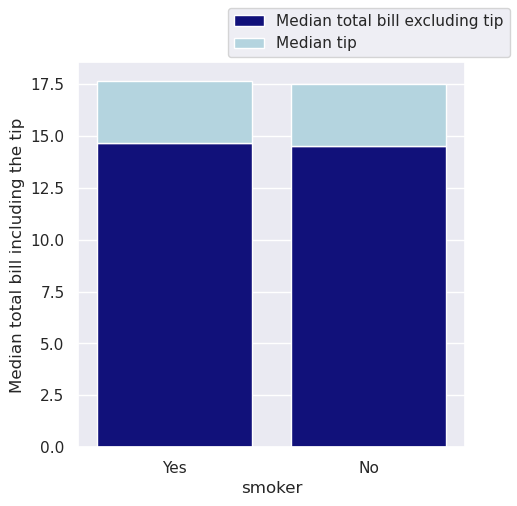

In [10]:
# initializing the axes to plot on
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# we assume that the total bill includes the tip
df_tips = df_tips.assign(
    total_bill_without_tip=df_tips.total_bill - df_tips.tip
)

total_bill_without_tip_bar = sns.barplot(
    df_tips, x="smoker", y="total_bill_without_tip", estimator="median", ax=ax, errorbar=None, color="darkblue", label="Median total bill excluding tip"
)  # same as grouping the df_tips by smoker and applying .agg("median") to the total_bill_without_tip column

# we would like to plot the median tip amount on top of the median total_bill_without_tip bar
height_to_start_plotting_tip = df_tips.groupby("smoker").total_bill_without_tip.agg(
    "median"
)
tip_bar = sns.barplot(
    df_tips,
    x="smoker",
    y="tip",
    estimator="mean",
    ax=ax,
    errorbar=None,
    color="lightblue",
    bottom=height_to_start_plotting_tip,
    label="Median tip"
)

# correcting ylabel
plt.ylabel("Median total bill including the tip")

# adding legend
fig.legend()

plt.show()

**`Analysis:`** In the pie chart section we've talked about why the choice of statistical representative matters. If we were to use "sum" for example in the above code it would have mis-represented the data. We chose "median" as the representator since it is fairly independent of any outliers in the data and also captures the central tendency of the data very well. We could've also used "mean" which is also a metric used to measure the central tendency of the data but keep in mind that, "mean" is heavily influenced by the outliers in the data.

#### <a id='toc2_1_2_'></a>[*Example of 100% Stacked Bar Plot Using Matplotlib*](#toc0_)

Drawing 100% Stacked Bar Plot is similar to plotting normal stacked bar plots. You just have to *represent the data in a way where each category's value is scaled to make up 100% of the total for each group or category.*

> `To draw` stacked bar charts we can also use the matplotlib function, `matplotlib.pyplot.bar(x, height_y, width=0.8, bottom=None, **kwargs)` function. The detailed documentation can be found at, https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html.

In [11]:
# df for plotting
df_tips_grouped_by_smoker_col = df_tips.groupby("smoker").agg({"total_bill_without_tip": "sum", "tip": "sum", "total_bill": "sum"}).reset_index()

In [12]:
df_tips_grouped_by_smoker_col

,smoker,total_bill_without_tip,tip,total_bill
0,Yes,1650.53,279.81,1930.34
1,No,2445.66,451.77,2897.43


In [13]:
df_tips_grouped_by_smoker_col = df_tips_grouped_by_smoker_col.assign(
    percent_of_tip = lambda df_: round((df_.tip / df_.total_bill) * 100, 2),
    percent_of_total_bill_excluding_tip = lambda df_: 100 - df_.percent_of_tip
)

In [14]:
df_tips_grouped_by_smoker_col

,smoker,total_bill_without_tip,tip,total_bill,percent_of_tip,percent_of_total_bill_excluding_tip
0,Yes,1650.53,279.81,1930.34,14.50,85.50
1,No,2445.66,451.77,2897.43,15.59,84.41


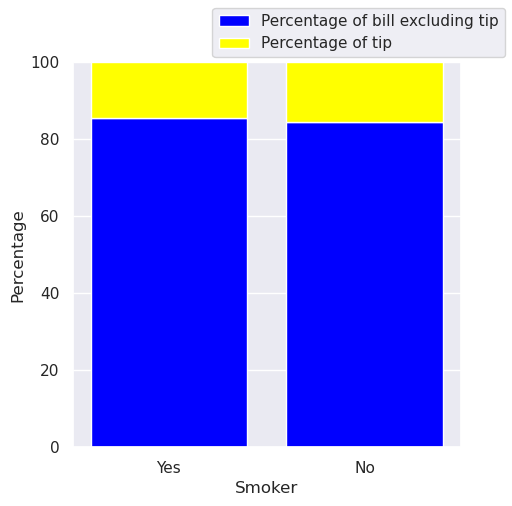

In [15]:
# initializing the axes to plot on
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# set the y lim from 0 to 100
ax.set_ylim(0, 100)

total_bill_without_tip_bar = ax.bar(
    x = df_tips_grouped_by_smoker_col.smoker, 
    height = df_tips_grouped_by_smoker_col.percent_of_total_bill_excluding_tip,
    color = "blue",
    label = "Percentage of bill excluding tip"
    )

tip_bar = ax.bar(
    x = df_tips_grouped_by_smoker_col.smoker, 
    height = df_tips_grouped_by_smoker_col.percent_of_tip,
    bottom = df_tips_grouped_by_smoker_col.percent_of_total_bill_excluding_tip,
    color = "yellow",
    label = "Percentage of tip"
    )


# adding axis labels
ax.set(xlabel="Smoker", ylabel="Percentage")

# adding legend
fig.legend()

plt.show()

**`Analysis:`** In the previous section when drawing "Stacked bar charts" we used the median as a statistical representative because of an imbalanced dataset. When dealing with imbalanced data, using sums in stacked bar charts can exaggerate the differences between categories due to the varying number of data points. However, when using 100% stacked bar charts, the data is scaled to 100%, which mitigates the impact of the imbalanced dataset *to some extent*.

In 100% stacked bar charts, you're focusing on the relative proportions within each category, and the fact that the data is scaled to 100% helps in making fairer comparisons between categories, even if one category is underrepresented in the original dataset (*If your goal is to compare across categories use normal bar plots or some other kind of plots that suits the data. Stacked bar charts are not ideal for comparison across different categories. It's supposed to show the composition of the subcategories of a particular category*). 

Therefore, for 100% stacked bar charts, using sums or medians may not make a significant difference in terms of how the data is visually represented.

Ultimately, the choice between using sums or medians in a 100% stacked bar chart should align with your communication goals and what you want to emphasize to your audience.